In [65]:
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda

In [66]:
forestfires=pd.read_csv("C:\\Users\\Trupti Kendre\\Downloads\\forestfires (1).csv")

In [67]:
forestfires.drop(["month","day"],axis=1,inplace = True)

In [68]:
forestfires["size_category"].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [69]:
forestfires.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [70]:
forestfires.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# taking small as 0 and large as 1

In [71]:
forestfires.loc[forestfires["size_category"]=='small','size_category']=0
forestfires.loc[forestfires["size_category"]=='large','size_category']=1
forestfires["size_category"].value_counts()

0    378
1    139
Name: size_category, dtype: int64

# normalization

In [72]:
def norm_func(i):
     x = (i-i.min())/(i.max()-i.min())
     return (x)

In [73]:
predictors = forestfires.iloc[:,0:28]
target = forestfires.iloc[:,28]


In [74]:
predictors1 = norm_func(predictors)

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(predictors1,target, test_size=0.3,stratify = target)



In [76]:
def prep_model(hidden_dim):
    model = Sequential()
    for i in range(1,len(hidden_dim)-1):
        if (i==1):
            model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],activation="relu"))
        else:
            model.add(Dense(hidden_dim[i],activation="relu"))
    model.add(Dense(hidden_dim[-1],kernel_initializer="normal",activation="sigmoid"))
    model.compile(loss="binary_crossentropy",
                  optimizer = "rmsprop",
                  metrics = ["accuracy"])
    return model  

In [77]:
first_model = prep_model([28,50,40,20,1])
first_model.fit(np.array(x_train).astype(np.int),np.array(y_train).astype(np.int),epochs=500)
pred_train = first_model.predict(np.array(x_train).astype(np.int))

Epoch 1/500


C:\Users\TRUPTI~1\AppData\Local\Temp/ipykernel_25968/2943197496.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  first_model.fit(np.array(x_train).astype(np.int),np.array(y_train).astype(np.int),epochs=500)


12/12 [==============================] - 1s 3ms/step - loss: 0.6774 - accuracy: 0.6981
Epoch 2/500
12/12 [==============================] - 0s 4ms/step - loss: 0.6441 - accuracy: 0.7313
Epoch 3/500
12/12 [==============================] - 0s 3ms/step - loss: 0.6121 - accuracy: 0.7313
Epoch 4/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5910 - accuracy: 0.7313
Epoch 5/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5830 - accuracy: 0.7313
Epoch 6/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5779 - accuracy: 0.7313
Epoch 7/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5747 - accuracy: 0.7313
Epoch 8/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5732 - accuracy: 0.7313
Epoch 9/500
12/12 [==============================] - 0s 2ms/step - loss: 0.5699 - accuracy: 0.7313
Epoch 10/500
12/12 [==============================] - 0s 3ms/step - loss: 0.5690 - accuracy: 0.7313
Epoch 11/500
12/12 [=

C:\Users\TRUPTI~1\AppData\Local\Temp/ipykernel_25968/2943197496.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pred_train = first_model.predict(np.array(x_train).astype(np.int))


# converting the predict values to series

In [78]:
pred_train = pd.Series([i[0] for i in pred_train])

In [79]:
size = ["small","large"]
pred_train_class = pd.Series(["small"]*361)
pred_train_class[[i>0.5 for i in pred_train]]= "large"

In [80]:
train = pd.concat([x_train,y_train],axis=1)
train["size_category"].value_counts()


0    264
1     97
Name: size_category, dtype: int64

In [81]:
from sklearn.metrics import confusion_matrix
train["original_class"] = "small"
train.loc[train["size_category"]==1,"original_class"] = "large"
train.original_class.value_counts()
confusion_matrix(pred_train_class,train["original_class"])
np.mean(pred_train_class==pd.Series(train["original_class"]).reset_index(drop=True)) #100%
pd.crosstab(pred_train_class,pd.Series(train["original_class"]).reset_index(drop=True))


original_class,large,small
row_0,,
large,22,9
small,75,255


In [82]:

pred_test = first_model.predict(np.array(x_test))
pred_test = pd.Series([i[0] for i in pred_test])

5/5 [==============================] - 0s 2ms/step


In [83]:

pred_test_class = pd.Series(["small"]*156)
pred_test_class[[i>0.5 for i in pred_test]] = "large"
test =pd.concat([x_test,y_test],axis=1)
test["original_class"]="small"
test.loc[test["size_category"]==1,"original_class"] = "large"

In [84]:
test["original_class"].value_counts()

small    114
large     42
Name: original_class, dtype: int64

In [85]:
np.mean(pred_test_class==pd.Series(test["original_class"]).reset_index(drop=True)) # 85%
confusion_matrix(pred_test_class,test["original_class"])
pd.crosstab(pred_test_class,pd.Series(test["original_class"]).reset_index(drop=True))

original_class,large,small
row_0,,
small,42,114


# gas turbines dataset

In [86]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [87]:
gas = pd.read_csv("C:\\Users\\Trupti Kendre\\Downloads\\gas_turbines.csv")

In [88]:
gas

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [89]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [90]:
gas.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [91]:
gas.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

C:\Users\Trupti Kendre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TEY'>

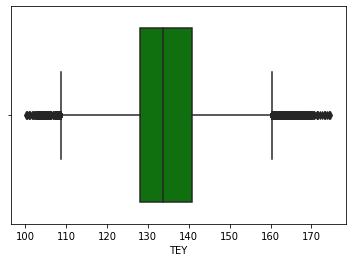

In [92]:
sns.boxplot(gas['TEY'], color='green')

In [93]:
x = gas.loc[:,['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX']]
y= gas.loc[:,['TEY']]

In [94]:
scaled = StandardScaler()
x = scaled.fit_transform(x)
y = scaled.fit_transform(y)

In [95]:
def baseline_model():
    model = Sequential()
    model.add(Dense(10, input_dim=10, activation='tanh'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [96]:
import keras
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import InputLayer,Dense
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=100, verbose=False)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, x, y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

C:\Users\TRUPTI~1\AppData\Local\Temp/ipykernel_25968/3166752672.py:6: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=100, verbose=False)


Results: -0.15 (0.08) MSE


In [97]:
estimator.fit(x, y)
prediction = estimator.predict(x)
prediction

array([-1.0885243, -1.0719334, -1.0701728, ..., -0.7194831, -0.7831533,
       -0.8733213], dtype=float32)

In [98]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [99]:
estimator.fit(x_train, y_train)
prediction = estimator.predict(x_test)

In [100]:
prediction

array([-0.04585219, -0.37263066, -0.5331808 , ..., -0.18176825,
        0.10625786,  0.49142358], dtype=float32)

In [101]:
x = gas.drop(columns = ['TEY'], axis = 1) 
y = gas.iloc[:,7]
from sklearn.preprocessing import scale
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)
x_train_scaled = scale(x_train)
x_test_scaled = scale(x_test)
x_test_scaled

array([[ 0.82623246, -0.43954308, -0.25924569, ...,  0.10039242,
        -0.3796304 , -0.69217007],
       [ 0.35282087,  0.23279782,  0.80230139, ..., -1.18541222,
         0.39149515, -1.09475442],
       [ 0.32839008, -0.07135639,  0.25312287, ...,  0.01665304,
        -0.00296896, -0.31891741],
       ...,
       [-0.74071701,  0.37687087,  0.43427425, ...,  1.77157829,
        -1.00127821, -0.4818816 ],
       [-0.49965786, -0.39151873,  0.64680105, ..., -0.26517949,
        -0.48137538,  0.12808615],
       [ 0.13151427,  0.32884652,  0.98830762, ..., -1.40331469,
         0.13152215, -0.64456466]])

In [102]:
import tensorflow as tf
input_size = len(x.columns)
output_size = 1
hidden_layer_size = 50

model = tf.keras.Sequential([
                                
                               tf.keras.layers.Dense(hidden_layer_size, input_dim = input_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),     
                               tf.keras.layers.Dense(output_size)
                             ])

In [103]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.03)
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MeanSquaredError'])
num_epochs = 100
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2)
model.fit(x_train_scaled, y_train, callbacks = early_stopping, validation_split = 0.1, epochs = num_epochs, verbose = 2)

Epoch 1/100
381/381 - 2s - loss: 2980.0088 - mean_squared_error: 2980.0088 - val_loss: 217.7053 - val_mean_squared_error: 217.7053 - 2s/epoch - 6ms/step
Epoch 2/100
381/381 - 1s - loss: 118.9809 - mean_squared_error: 118.9809 - val_loss: 96.4049 - val_mean_squared_error: 96.4049 - 1s/epoch - 3ms/step
Epoch 3/100
381/381 - 1s - loss: 54.7118 - mean_squared_error: 54.7118 - val_loss: 43.2850 - val_mean_squared_error: 43.2850 - 1s/epoch - 3ms/step
Epoch 4/100
381/381 - 1s - loss: 23.6709 - mean_squared_error: 23.6709 - val_loss: 16.5557 - val_mean_squared_error: 16.5557 - 1s/epoch - 3ms/step
Epoch 5/100
381/381 - 1s - loss: 10.5480 - mean_squared_error: 10.5480 - val_loss: 9.5604 - val_mean_squared_error: 9.5604 - 1s/epoch - 3ms/step
Epoch 6/100
381/381 - 1s - loss: 5.4250 - mean_squared_error: 5.4250 - val_loss: 3.5569 - val_mean_squared_error: 3.5569 - 979ms/epoch - 3ms/step
Epoch 7/100
381/381 - 1s - loss: 3.1039 - mean_squared_error: 3.1039 - val_loss: 2.5433 - val_mean_squared_error:

In [104]:
test_loss, mean_squared_error = model.evaluate(x_test_scaled, y_test)

47/47 [==============================] - 0s 2ms/step - loss: 0.7945 - mean_squared_error: 0.7945


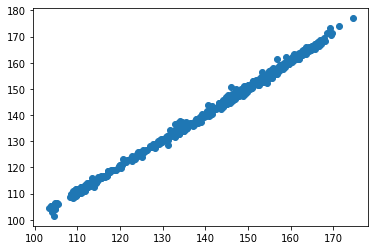

In [105]:
predictions = model.predict_on_batch(x_test_scaled)
plt.scatter(y_test, predictions)

In [106]:
predictions_df = pd.DataFrame()
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = predictions
predictions_df['% Error'] = abs(predictions_df['Actual'] - predictions_df['Predicted'])/predictions_df['Actual']*100
predictions_df.reset_index(drop = True)

,Actual,Predicted,% Error
0,134.46,135.316711,0.637150
1,111.88,112.898521,0.910370
2,133.72,134.834183,0.833221
3,133.79,134.292496,0.375585
4,110.77,111.670433,0.812885
...,...,...,...
1499,132.85,133.685715,0.629066
1500,125.07,124.046326,0.818481
1501,160.95,162.137238,0.737644
1502,133.12,133.658234,0.404322
